<a href="https://colab.research.google.com/github/VEDANTPARAB404/SY-SKILL/blob/main/GraphComparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2, f_classif, mutual_info_classif
from sklearn.preprocessing import StandardScaler

# Load the wine dataset
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = wine.target

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize VarianceThreshold with a threshold value
selector = VarianceThreshold(threshold=0.2)
X_variance = selector.fit_transform(X_scaled)

# Get the selected feature names
selected_features_variance = X.columns[selector.get_support()]
print("Selected features using Variance Threshold:", selected_features_variance.tolist())

# Initialize SelectKBest with chi2
chi2_selector = SelectKBest(chi2, k=5)
X_chi2 = chi2_selector.fit_transform(X, y)

# Get the selected feature names
selected_features_chi2 = X.columns[chi2_selector.get_support()]
print("Selected features using Chi-Square Test:", selected_features_chi2.tolist())

# Initialize SelectKBest with ANOVA F-Value
anova_selector = SelectKBest(f_classif, k=5)
X_anova = anova_selector.fit_transform(X, y)

# Get the selected feature names
selected_features_anova = X.columns[anova_selector.get_support()]
print("Selected features using ANOVA F-Value:", selected_features_anova.tolist())

# Initialize SelectKBest with Information Gain
info_gain_selector = SelectKBest(mutual_info_classif, k=5)
X_info_gain = info_gain_selector.fit_transform(X, y)

# Get the selected feature names
selected_features_info_gain = X.columns[info_gain_selector.get_support()]
print("Selected features using Information Gain:", selected_features_info_gain.tolist())

import numpy as np

# Calculate the correlation matrix
corr_matrix = pd.DataFrame(X_scaled, columns=X.columns).corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.8
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

# Drop features
X_corr = pd.DataFrame(X_scaled, columns=X.columns).drop(columns=to_drop)

print("Selected features using Pearson's Correlation Coefficient:", X_corr.columns.tolist())

# Convert numpy arrays back to DataFrames for saving
X_variance_df = pd.DataFrame(X_variance, columns=selected_features_variance)
X_chi2_df = pd.DataFrame(X_chi2, columns=selected_features_chi2)
X_anova_df = pd.DataFrame(X_anova, columns=selected_features_anova)
X_info_gain_df = pd.DataFrame(X_info_gain, columns=selected_features_info_gain)
X_corr_df = pd.DataFrame(X_corr, columns=X_corr.columns)

# Save to CSV
X_variance_df.to_csv('wine_variance_filtered.csv', index=False)
X_chi2_df.to_csv('wine_chi2_filtered.csv', index=False)
X_anova_df.to_csv('wine_anova_filtered.csv', index=False)
X_info_gain_df.to_csv('wine_info_gain_filtered.csv', index=False)
X_corr_df.to_csv('wine_corr_filtered.csv', index=False)

Selected features using Variance Threshold: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Selected features using Chi-Square Test: ['alcalinity_of_ash', 'magnesium', 'flavanoids', 'color_intensity', 'proline']
Selected features using ANOVA F-Value: ['alcohol', 'flavanoids', 'color_intensity', 'od280/od315_of_diluted_wines', 'proline']
Selected features using Information Gain: ['alcohol', 'flavanoids', 'color_intensity', 'od280/od315_of_diluted_wines', 'proline']
Selected features using Pearson's Correlation Coefficient: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [2]:
# prompt: find accuaracy of all the given

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assuming you have the DataFrames X_variance_df, X_chi2_df, X_anova_df, X_info_gain_df, and X_corr_df

def evaluate_accuracy(X, y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  model = LogisticRegression(max_iter=1000)  # Increase max_iter if needed
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  return accuracy

# Evaluate the accuracy of each feature selection method
accuracy_variance = evaluate_accuracy(X_variance_df, y)
accuracy_chi2 = evaluate_accuracy(X_chi2_df, y)
accuracy_anova = evaluate_accuracy(X_anova_df, y)
accuracy_info_gain = evaluate_accuracy(X_info_gain_df, y)
accuracy_corr = evaluate_accuracy(X_corr_df, y)

print("Accuracy using Variance Threshold:", accuracy_variance)
print("Accuracy using Chi-Square Test:", accuracy_chi2)
print("Accuracy using ANOVA F-Value:", accuracy_anova)
print("Accuracy using Information Gain:", accuracy_info_gain)
print("Accuracy using Pearson's Correlation Coefficient:", accuracy_corr)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Accuracy using Variance Threshold: 1.0
Accuracy using Chi-Square Test: 0.9722222222222222
Accuracy using ANOVA F-Value: 1.0
Accuracy using Information Gain: 1.0
Accuracy using Pearson's Correlation Coefficient: 1.0


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


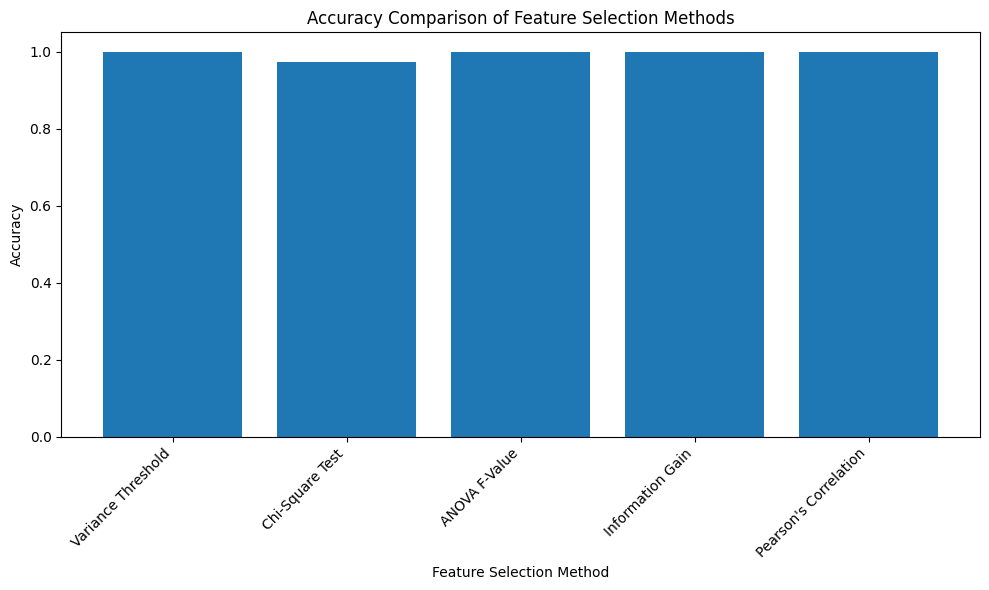

In [3]:
# prompt: create a graph comparing their accuracy

import matplotlib.pyplot as plt

# Accuracy results (replace with your actual accuracy values)
accuracy_results = {
    "Variance Threshold": accuracy_variance,
    "Chi-Square Test": accuracy_chi2,
    "ANOVA F-Value": accuracy_anova,
    "Information Gain": accuracy_info_gain,
    "Pearson's Correlation": accuracy_corr
}

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(accuracy_results.keys(), accuracy_results.values())
plt.xlabel("Feature Selection Method")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison of Feature Selection Methods")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()
